### imports

In [59]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#an attempt to translate our firt table
import googletrans
from googletrans import Translator

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics


### scraping a table from wikipedia with the help of the command 'read_html'

In [60]:
url = "https://he.wikipedia.org/wiki/%D7%AA%D7%91%D7%A0%D7%99%D7%AA:%D7%A8%D7%99%D7%9B%D7%95%D7%96_%D7%98%D7%91%D7%9C%D7%90%D7%95%D7%AA_%D7%9E%D7%92%D7%A4%D7%AA_%D7%94%D7%A7%D7%95%D7%A8%D7%95%D7%A0%D7%94"
df=pd.read_html(url, skiprows=3)
df = df[0]
df.head(10)

,0,1,2,3,4,5,6,7,8
0,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3],NaN
1,231 מדינות/טריטוריות + 2 ספינות,430481923,54294,79331,5938743,749,60.08%,53.28%,NaN
2,ארצות הברית[4] / [ערך],80372404,240496,10011,966530,2892,79.80%,66.51%,NaN
3,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%,NaN
4,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%,NaN
5,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%,NaN
6,הממלכה המאוחדת / [ערך],18734683,273609,312,160979,2351,NaN,NaN,NaN
7,רוסיה / [ערך],15928568,109072,2300,348578,2387,NaN,NaN,NaN
8,גרמניה / [ערך],14092621,167322,2494,122622,1456,75.28%,74.29%,NaN
9,טורקיה / [ערך],13762181,160340,1128,93258,1087,NaN,NaN,NaN


### checking for null valuse

In [61]:
df.isnull().sum()


0      2
1      6
2     15
3      6
4    160
5    309
6    401
7    462
8    660
dtype: int64

### droping the 8th column (all null)

In [62]:
del df[8]


### changing the first row to be the title 

In [63]:
df.columns = df. iloc[0]
df = df. drop(0)
df = df. reset_index(drop=True)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
0,231 מדינות/טריטוריות + 2 ספינות,430481923,54294,79331,5938743,749,60.08%,53.28%
1,ארצות הברית[4] / [ערך],80372404,240496,10011,966530,2892,79.80%,66.51%
2,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%
3,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%
4,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%


### droping the first row that is Irrelevant

In [64]:
df = df. drop(0)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
1,ארצות הברית[4] / [ערך],80372404,240496,10011,966530,2892,79.80%,66.51%
2,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%
3,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%
4,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%
5,הממלכה המאוחדת / [ערך],18734683,273609,312,160979,2351,NaN,NaN


In [65]:

df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
655,קלקיליה,13971,203,13433,NaN,NaN,NaN,NaN
656,סלפית,11860,109,11683,NaN,NaN,NaN,NaN
657,טובאס,8565,90,8286,NaN,NaN,NaN,NaN
658,יריחו,8072,64,7874,NaN,NaN,NaN,NaN
659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### we want only the first 226 rows (only countries) 

In [66]:
for i in range (227,660):
    df = df.drop(i)



In [67]:
df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
222,MS Zaandam‏ (אנ') אוניית תענוגות,9,NaN,0,2,NaN,NaN,NaN
223,איי מרשל,7,117,0,0,NaN,NaN,NaN
224,איי קוק,6,341,?,0,NaN,NaN,NaN
225,סנט הלנה,2,327,0,0,NaN,NaN,NaN
226,מיקרונזיה,1,9,0,0,NaN,NaN,NaN


### we have lots of null valuse so we searched for more data.

### we found a table with all the countries and the presentage of vaccenated.

In [68]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccine"
df2 =pd.read_html(url, skiprows=1)
df2 = df2[1]
df2.head(10)

,Unnamed: 0,World[d],"4,922,821,028",62.5%
0,NaN,China,1266426000,87.7%
1,NaN,India,963517480,69.2%
2,NaN,European Union,335049868,74.9%
3,NaN,United States[e],253055679,76.2%
4,NaN,Indonesia,190445824,68.9%
5,NaN,Brazil,176625569,82.5%
6,NaN,Pakistan,124309711,55.2%
7,NaN,Bangladesh,103358935,62.1%
8,NaN,Japan,101626424,80.6%
9,NaN,Mexico,85050217,65.3%


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   World[d]       221 non-null    object 
 2   4,922,821,028  221 non-null    int64  
 3   62.5%          221 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [70]:
del df2['Unnamed: 0']
del df2['4,922,821,028']
df2.head()

,World[d],62.5%
0,China,87.7%
1,India,69.2%
2,European Union,74.9%
3,United States[e],76.2%
4,Indonesia,68.9%


In [71]:
df2.rename({'World[d]': 'Country','62.2%':'vaccenated'}, axis=1, inplace=True)
df2.head()

,Country,62.5%
0,China,87.7%
1,India,69.2%
2,European Union,74.9%
3,United States[e],76.2%
4,Indonesia,68.9%


In [72]:
#df['Country'].rename({0: 'Country', 1: 'unfaction'}, axis=1, inplace=True)
df2 = df2.replace(regex=[' '], value='')
df2.head()

,Country,62.5%
0,China,87.7%
1,India,69.2%
2,EuropeanUnion,74.9%
3,UnitedStates[e],76.2%
4,Indonesia,68.9%


In [73]:

df2['Country'] = df2['Country'].replace(['UnitedStates[e]'],'USA')
df2['Country'] = df2['Country'].replace(['UnitedKingdom'],'UK')
df2['Country'] = df2['Country'].replace(['Italy[f]'],'Italy')
df2['Country'] = df2['Country'].replace(['SouthKorea'],'S.Korea')
df2.head(20)

,Country,62.5%
0,China,87.7%
1,India,69.2%
2,EuropeanUnion,74.9%
3,USA,76.2%
4,Indonesia,68.9%
5,Brazil,82.5%
6,Pakistan,55.2%
7,Bangladesh,62.1%
8,Japan,80.6%
9,Mexico,65.3%


### we still have a lack of data so we kept on searching for more data.

In [74]:

url = "https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?/embed/fd0k_hbXWcQ"

res = requests.get(url)
soup = bs(res.content, 'html.parser')

table_data = soup.select_one('#main_table_countries_today')


In [75]:
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)

In [76]:

df3 = pd.DataFrame(columns = headers)

for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df3)
        
        df3.loc[length] = row
df3.head() 

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"94,514,172","+18,678","1,392,890",+449,"64,773,879","+19,347","28,347,403","16,265",...,,,,North America,\n,,,,,
1,,\nAsia\n,"114,189,083","+432,823","1,340,394","+1,325","105,686,932","+209,157","7,161,757","31,275",...,,,,Asia,\n,,,,,
2,,\nSouth America\n,"53,742,349",+794,"1,252,449",+6,"47,166,139","+1,087","5,323,761","13,767",...,,,,South America,\n,,,,,
3,,\nEurope\n,"153,321,372","+301,093","1,697,694","+1,791","128,059,452","+585,543","23,564,226","15,939",...,,,,Europe,\n,,,,,
4,,\nAfrica\n,"11,487,921","+1,542","248,526",+10,"10,526,802","+3,929","712,593","1,874",...,,,,Africa,\n,,,,,


In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    242 non-null    object
 1   Country,Other        242 non-null    object
 2   TotalCases           242 non-null    object
 3   NewCases             242 non-null    object
 4   TotalDeaths          242 non-null    object
 5   NewDeaths            242 non-null    object
 6   TotalRecovered       242 non-null    object
 7   NewRecovered         242 non-null    object
 8   ActiveCases          242 non-null    object
 9   Serious,Critical     242 non-null    object
 10  Tot Cases/1M pop     242 non-null    object
 11  Deaths/1M pop        242 non-null    object
 12  TotalTests           242 non-null    object
 13  Tests/
1M pop
       242 non-null    object
 14  Population           242 non-null    object
 15  Continent            242 non-null    object
 16  1 Caseev

In [78]:
df3 = df3.replace(regex=['\n'], value='')
df3 = df3.replace(regex=[' '], value='')
df3 = df3.replace(regex=[','], value='')

#df3 = df3.replace(regex=["+"], value='')
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    242 non-null    object
 1   Country,Other        242 non-null    object
 2   TotalCases           242 non-null    object
 3   NewCases             242 non-null    object
 4   TotalDeaths          242 non-null    object
 5   NewDeaths            242 non-null    object
 6   TotalRecovered       242 non-null    object
 7   NewRecovered         242 non-null    object
 8   ActiveCases          242 non-null    object
 9   Serious,Critical     242 non-null    object
 10  Tot Cases/1M pop     242 non-null    object
 11  Deaths/1M pop        242 non-null    object
 12  TotalTests           242 non-null    object
 13  Tests/
1M pop
       242 non-null    object
 14  Population           242 non-null    object
 15  Continent            242 non-null    object
 16  1 Caseev

### the colomns with 'new' (cases, dethes, recovered..) are missing lots of data.
### in addition we didnt fined a way to deleat the char '+' so that we could convert the colomn to intiger.
### In any case, we dont think that there is a strong co variance between the colomn "TotalTests"
### therefore we will drop those colomns

In [79]:
del df3['NewCases'] # +
del df3['NewDeaths'] # +
del df3['NewRecovered'] # +
del df3['Continent'] # irrelevent
del df3['New Deaths/1M pop'] # mostly null valuse
del df3['New Cases/1M pop'] # mostly null valuse
del df3['TotalCases'] # we have pair 1M
del df3['TotalDeaths'] # we have pair 1M
del df3['TotalTests'] # we have pair 1M
del df3['ActiveCases'] # we have pair 1M
del df3['1 Caseevery X ppl'] # we have pair 1M
del df3['1 Deathevery X ppl'] # we have pair 1M
del df3['1 Testevery X ppl'] # we have pair 1M

df3.head()

,#,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,,NorthAmerica,64773879,16265,,,,,
1,,Asia,105686932,31275,,,,,
2,,SouthAmerica,47166139,13767,,,,,
3,,Europe,128059452,15939,,,,,
4,,Africa,10526802,1874,,,,,


### droping the 7 first rows which are irrelevent (Continents and the whole world)

In [80]:
for i in range (0,8):
    df3 = df3.drop(i)
df3.head()

,#,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,1,USA,52453562,10011,240496,2892,2825085,334194157,80649
9,2,India,42219896,8944,30579,366,544508,1402309809,106
10,3,Brazil,25772807,8318,132464,3006,296573,215043743,9608
11,4,France,20009852,3055,342969,2099,3717379,65511023,35428
12,5,UK,17011869,312,273609,2351,6991928,68472378,22810


In [81]:
df3.rename({'Country,Other': 'Country'}, axis=1, inplace=True)
df3.head()

,#,Country,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,1,USA,52453562,10011,240496,2892,2825085,334194157,80649
9,2,India,42219896,8944,30579,366,544508,1402309809,106
10,3,Brazil,25772807,8318,132464,3006,296573,215043743,9608
11,4,France,20009852,3055,342969,2099,3717379,65511023,35428
12,5,UK,17011869,312,273609,2351,6991928,68472378,22810


In [82]:
del df3['#']

## we tried to translate df1, but we didnt seccied and we had all the columns already in df3 accept of "fully vaccenated" therefore we decided to not use the first table.

### we merged fd2 with df3 

In [83]:
final_df = pd.merge( df2, df3, how="left", on=["Country", "Country"])
final_df.head()

,Country,62.5%,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,China,87.7%,101646,18,75,3,111163,1439323776,1
1,India,69.2%,42219896,8944,30579,366,544508,1402309809,106
2,EuropeanUnion,74.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,76.2%,52453562,10011,240496,2892,2825085,334194157,80649
4,Indonesia,68.9%,4674873,2807,19435,529,298354,278278496,2106


In [84]:
final_df.isnull().sum()

Country                 0
62.5%                   0
TotalRecovered         23
Serious,Critical       23
Tot Cases/1M pop       23
Deaths/1M pop          23
Tests/\n1M pop\n       23
Population             23
Active Cases/1M pop    23
dtype: int64

### we have 23 Countries that didenf fined a mach, we decided to drop them because the colomn of the presentege of vaccenation is more important.

In [85]:
final_df.shape


(221, 9)

In [86]:
final_df = final_df.dropna()
final_df.isnull().sum()

Country                0
62.5%                  0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [87]:
final_df.shape

(198, 9)

### chainging the colomn 'Country' to be the leading index

In [88]:
final_df = final_df.set_index('Country')
final_df.head()

,62.5%,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
China,87.7%,101646,18,75,3,111163,1439323776,1
India,69.2%,42219896,8944,30579,366,544508,1402309809,106
USA,76.2%,52453562,10011,240496,2892,2825085,334194157,80649
Indonesia,68.9%,4674873,2807,19435,529,298354,278278496,2106
Brazil,82.5%,25772807,8318,132464,3006,296573,215043743,9608


In [89]:
final_df = final_df.replace(regex=['%'], value='') 
final_df = final_df.replace(regex=[''], value=np.nan) # empty valuse
final_df = final_df.replace(regex=['N/A'], value=np.nan) # empty valuse
final_df = final_df.replace(regex=[' '], value='') # removing spaces
final_df.isnull().sum()
final_df.tail()


,62.5%,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,67.6,2506,4,166065,591,3375287,15223,854
Burundi,0.1,773,NaN,3049,3,27721,12472255,2984
WallisandFutuna,55.4,438,NaN,41594,641,1878882,10915,825
FalklandIslands,75.6,NaN,NaN,24410,NaN,2367526,3646,1097
Montserrat,37.4,161,NaN,32620,400,1560136,4997,NaN


In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, China to Montserrat
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   62.5%                198 non-null    object
 1   TotalRecovered       190 non-null    object
 2   Serious,Critical     151 non-null    object
 3   Tot Cases/1M pop     198 non-null    object
 4   Deaths/1M pop        194 non-null    object
 5   Tests/
1M pop
       189 non-null    object
 6   Population           198 non-null    object
 7   Active Cases/1M pop  197 non-null    object
dtypes: object(8)
memory usage: 13.9+ KB


In [91]:
final_df.isnull().sum()


62.5%                   0
TotalRecovered          8
Serious,Critical       47
Tot Cases/1M pop        0
Deaths/1M pop           4
Tests/\n1M pop\n        9
Population              0
Active Cases/1M pop     1
dtype: int64

### we checked why we have so much empty valuse in the colomn "Serious,Critical", so we thought maby thay have no  Serious cases, so we checed online and we found that we were right! - https://www.coronatracker.com/country/georgia/ , https://www.coronatracker.com/country/united-arab-emirates/



In [92]:
final_df['Serious,Critical'].fillna('0', inplace = True)
final_df.tail()

,62.5%,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,67.6,2506,4,166065,591,3375287,15223,854
Burundi,0.1,773,0,3049,3,27721,12472255,2984
WallisandFutuna,55.4,438,0,41594,641,1878882,10915,825
FalklandIslands,75.6,NaN,0,24410,NaN,2367526,3646,1097
Montserrat,37.4,161,0,32620,400,1560136,4997,NaN


In [93]:

final_df = final_df.dropna()

In [94]:
final_df.isnull().sum()

62.5%                  0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [95]:
final_df.shape

(182, 8)

### custing all colomns to float

In [96]:
for i in final_df:
    final_df[i] = final_df[i].astype(float, errors = 'raise')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   62.5%                182 non-null    float64
 1   TotalRecovered       182 non-null    float64
 2   Serious,Critical     182 non-null    float64
 3   Tot Cases/1M pop     182 non-null    float64
 4   Deaths/1M pop        182 non-null    float64
 5   Tests/
1M pop
       182 non-null    float64
 6   Population           182 non-null    float64
 7   Active Cases/1M pop  182 non-null    float64
dtypes: float64(8)
memory usage: 12.8+ KB


### Normalization per million

In [97]:
for rows in  range (0,145):
    final_df['TotalRecovered'][rows] = final_df['TotalRecovered'][rows] / final_df['Population'][rows] * 1000000  
    final_df['Serious,Critical'][rows] = final_df['Serious,Critical'][rows] / final_df['Population'][rows] * 1000000    
final_df.rename({'TotalRecovered': 'TotalRecovered1MPop','Serious,Critical': 'Critical1MPop' }, axis=1, inplace=True)
final_df.tail()

,62.5%,TotalRecovered1MPop,Critical1MPop,Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
SanMarino,72.2,13703.0,4.0,417264.0,3289.0,3955240.0,34048.0,11513.0
CaribbeanNetherlands,72.3,7418.0,0.0,283504.0,1164.0,1131535.0,26624.0,3718.0
Anguilla,67.6,2506.0,4.0,166065.0,591.0,3375287.0,15223.0,854.0
Burundi,0.1,773.0,0.0,3049.0,3.0,27721.0,12472255.0,2984.0
WallisandFutuna,55.4,438.0,0.0,41594.0,641.0,1878882.0,10915.0,825.0


### editing colomns name

In [98]:

final_df = final_df.set_axis(['vaccenatedPresent','TotalRecovered1MPop', 'Critical1MPop', 'TotCases1MPop', 'Deaths1MPop', 'Tests1MPop','Population','ActiveCases1MPop'], axis=1, inplace=False)


final_df.head()

,vaccenatedPresent,TotalRecovered1MPop,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,Population,ActiveCases1MPop
Country,,,,,,,,
China,87.7,70.620663,0.012506,75.0,3.0,111163.0,1.439324e+09,1.0
India,69.2,30107.395476,6.378049,30579.0,366.0,544508.0,1.402310e+09,106.0
USA,76.2,156955.353352,29.955640,240496.0,2892.0,2825085.0,3.341942e+08,80649.0
Indonesia,68.9,16799.260695,10.087017,19435.0,529.0,298354.0,2.782785e+08,2106.0
Brazil,82.5,119849.136927,38.680502,132464.0,3006.0,296573.0,2.150437e+08,9608.0


In [99]:
del final_df['TotalRecovered1MPop'] 
### We later on discoverd that this column completes the column that we wanted to predict and we received an accurate model 
del final_df['Population'] # not helpful
final_df.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop
Country,,,,,,
China,87.7,0.012506,75.0,3.0,111163.0,1.0
India,69.2,6.378049,30579.0,366.0,544508.0,106.0
USA,76.2,29.955640,240496.0,2892.0,2825085.0,80649.0
Indonesia,68.9,10.087017,19435.0,529.0,298354.0,2106.0
Brazil,82.5,38.680502,132464.0,3006.0,296573.0,9608.0


### lets check outlyers

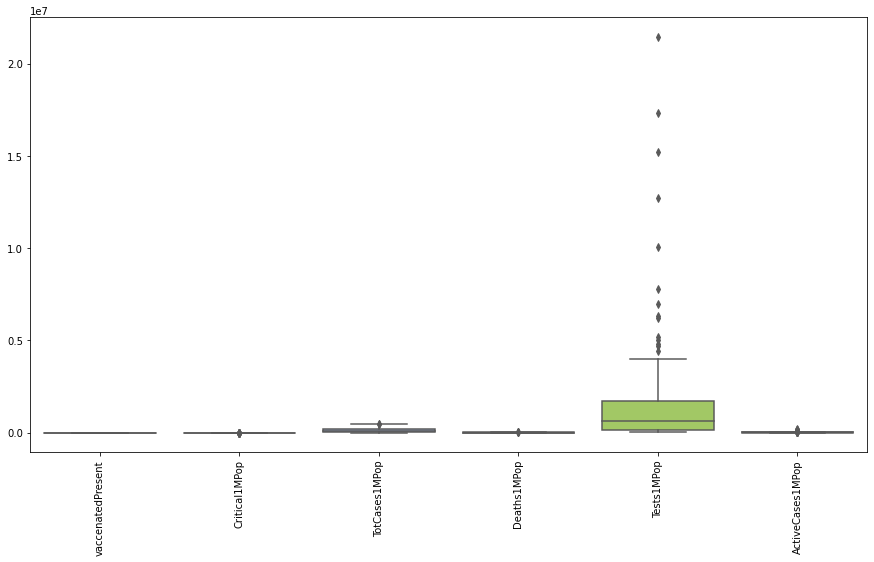

In [100]:
final_df_no_out = final_df
plt.figure(figsize=(15,8))
sns.boxplot(data = final_df,palette = "Set2")
plt.xticks(rotation=90)
plt.show()


### we have some  Outliers, lets remove them and tray the modeles again.


In [101]:

def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df





In [102]:

final_df_no_out = removeOutlier(final_df.vaccenatedPresent, final_df)
final_df_no_out = removeOutlier(final_df.Critical1MPop, final_df)
final_df_no_out = removeOutlier(final_df.TotCases1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Deaths1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Tests1MPop, final_df)
final_df_no_out = removeOutlier(final_df.ActiveCases1MPop, final_df)

lowerbound:  -27.725399937874926  -------- upperbound:  134.84188345435837
0  number of outliers from  182
 ******************************************************

lowerbound:  -38.625735685073906  -------- upperbound:  63.76463522477164
3  number of outliers from  182
 ******************************************************

lowerbound:  -242198.25304102738  -------- upperbound:  475786.50578828016
1  number of outliers from  182
 ******************************************************

lowerbound:  -2311.6254697016348  -------- upperbound:  4539.966129042294
2  number of outliers from  182
 ******************************************************

lowerbound:  -6896887.658074417  -------- upperbound:  10012254.306426065
5  number of outliers from  182
 ******************************************************

lowerbound:  -80915.70075227403  -------- upperbound:  113474.63262040589
6  number of outliers from  182
 ******************************************************



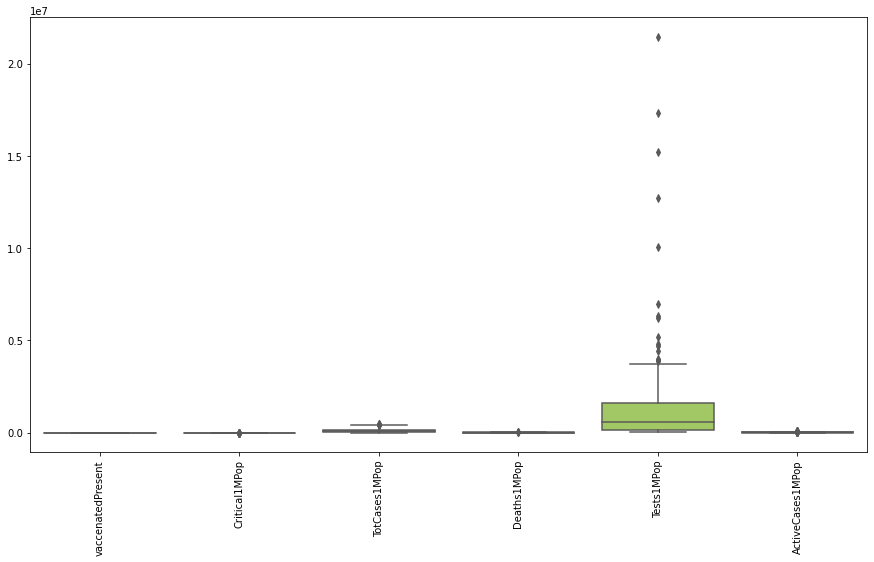

In [103]:

plt.figure(figsize=(15,8))
sns.boxplot(data = final_df_no_out,palette = "Set2")
plt.xticks(rotation=90)
plt.show()

In [104]:

final_df_no_out.shape


(176, 6)

In [105]:
final_df.shape

(182, 6)

In [106]:
final_df = final_df_no_out

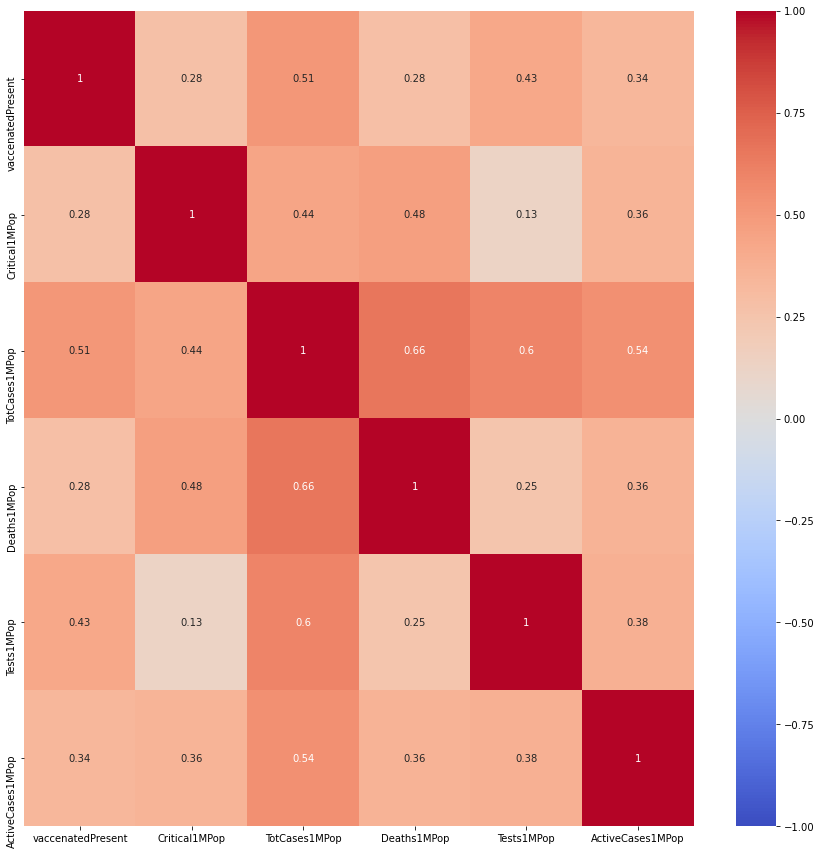

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = final_df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [108]:
corr[abs(corr['Deaths1MPop']) > 0.0]['Deaths1MPop']

vaccenatedPresent    0.284005
Critical1MPop        0.476289
TotCases1MPop        0.657300
Deaths1MPop          1.000000
Tests1MPop           0.247131
ActiveCases1MPop     0.364160
Name: Deaths1MPop, dtype: float64

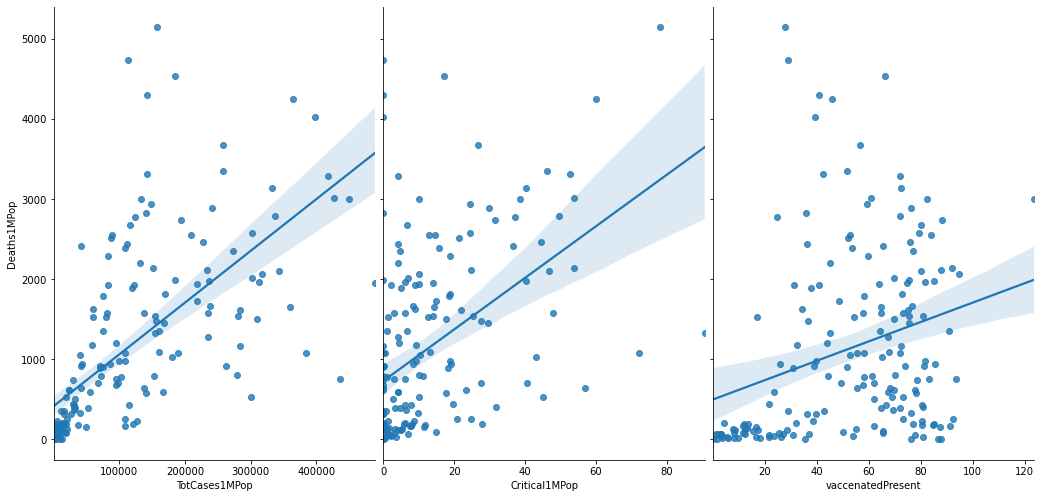

In [109]:
sns.pairplot(final_df, x_vars=['TotCases1MPop','Critical1MPop','vaccenatedPresent'], y_vars='Deaths1MPop', height=7, aspect=0.7, kind='reg')

### train- test split

In [110]:
X = final_df.drop("Deaths1MPop", axis=1)
y = final_df["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


### dummy model

In [111]:


from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE

In [112]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.081
our dummy mean absolute error is 954.


#### R squared = 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. 

## scaling the tada
#### we are checking two different scalers to see if one of them is better for our modle

In [113]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.fit_transform(X_train)

### Linear Regression  model

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [115]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

R2_scores_2 = cross_val_score(linreg, X_train_scaled2, y_train, cv=kf)
y_predict_2 = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
mae_2 = MAE(y_train, y_predict_2)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_2.mean()))
print("MAE score:" +(str)(mae_2))



result for StandardScaler:
R2 score:0.45614538835301166
MAE score:593.3507211866657
result for MinMaxScaler:
R2 score:0.45614538835301177
MAE score:593.3507211866657


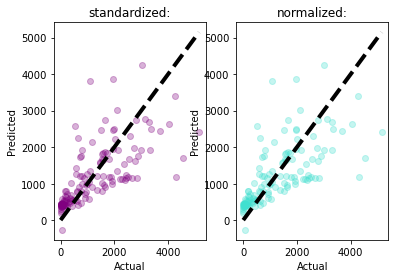

In [116]:

fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='turquoise')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [117]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(linreg.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}


### as we can see there are no hyperprameters (numbers) to make the model as optimal as it couled be

### feature selection:


In [118]:
# I will use this function for make a copy of
# train set by specific correlation limit.

# copy X with columns which grater than specific limit:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    X_copy = pd.DataFrame(X_copy)
    for l in limits.corr:
        if (l < lim):
            X_copy.drop(l, inplace=True)
    return X_copy

In [119]:

print('correlations (without the sign+-):')
correlations = abs(corr['Deaths1MPop']).sort_values(ascending=False)
correlations.drop('Deaths1MPop', inplace=True)
#correlations = pd.DataFrame(correlations)
#correlations.rename({'Deaths1MPop': 'corr'}, axis=1, inplace=True)

correlations

correlations (without the sign+-):


TotCases1MPop        0.657300
Critical1MPop        0.476289
ActiveCases1MPop     0.364160
vaccenatedPresent    0.284005
Tests1MPop           0.247131
Name: Deaths1MPop, dtype: float64

In [120]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.9]

mean_scores = []
std_scores = []
mae_scores = []


#for limit in corr_limits:
   # X_train_copy = copy_by_corr_limit(X_train_scaled1, limit, correlations)
   # R2_scores = cross_val_score(linreg, X_train_copy, y_train, cv=kf)
    #y_predict = cross_val_predict(linreg, X_train_copy, y_train, cv=kf)
    #mae_score = MAE(y_train, y_predict)
 
   # mean_scores.append(R2_scores.mean())
   # std_scores.append(R2_scores.std())
   # mae_scores.append(mae_score)
    
#pd.DataFrame(data={'lim correlation:':corr_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores})

### Random Forest Regressor Modle

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
RFR = RandomForestRegressor()

In [123]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

result for StandardScaler:
R2 score:0.4811866651198976
MAE score:512.0552142857142


In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [126]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### n_estimators = number of trees in the foreset
####  max_features = max number of features considered for splitting a node
#### max_depth = max number of levels in each decision tree
#### min_samples_split = min number of data points placed in a node before the node is split
#### min_samples_leaf = min number of data points allowed in a leaf node
#### bootstrap = method for sampling data points (with or without replacement)

In [127]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [128]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_scaled1, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [129]:
print("best R2 score is:")
print(rf_random.best_score_)

best R2 score is:
0.5413869378018238


In [130]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
    
    

In [132]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    print("result for StandardScaler" + str(K)+":")
    print("R2 score:" +(str)(R2_scores_standardized.mean()))
    print("MAE score:" +(str)(mae_standarsized))
    

result for StandardScaler1:
R2 score:0.1738379359573176
MAE score:667.3285714285714
result for StandardScaler2:
R2 score:0.3516269713219404
MAE score:617.35
result for StandardScaler3:
R2 score:0.45407825795180223
MAE score:584.7666666666665
result for StandardScaler4:
R2 score:0.49729378882253217
MAE score:552.5071428571429
result for StandardScaler5:
R2 score:0.4888184733017137
MAE score:559.8928571428571
result for StandardScaler6:
R2 score:0.49627226102096955
MAE score:551.9369047619047
result for StandardScaler7:
R2 score:0.5174245056956549
MAE score:540.0765306122449
result for StandardScaler8:
R2 score:0.516724643813995
MAE score:536.9491071428571
result for StandardScaler9:
R2 score:0.5055232231623682
MAE score:542.136507936508
result for StandardScaler10:
R2 score:0.5045482507410218
MAE score:542.0971428571429
result for StandardScaler11:
R2 score:0.5048366812261882
MAE score:539.5551948051948
result for StandardScaler12:
R2 score:0.5021037951984627
MAE score:543.670238095238


### more data

In [133]:
df4 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\hospitals_bed_per_1000.csv",skiprows=3)

df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1.959677,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170627,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.781043,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.061462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df5 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\Physicians_per_1000_ppl.csv",skiprows=3)

df5.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [135]:
del df4['Country Code']
del df4['Indicator Name']
del df4['Indicator Code']
df4.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
del df5['Country Code']
del df5['Indicator Name']
del df5['Indicator Code']
df5.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [137]:

df4.rename({'Unnamed: 65': 'Hospital_beds'}, axis=1, inplace=True)
df4.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df4.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df5.rename({'Unnamed: 65': 'Physicians'}, axis=1, inplace=True)
df5.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [139]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AfricaEasternandSouthern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,AfricaWesternandCentral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [140]:
df4['Country'] = df4['Country'].replace(['UnitedStates'],'USA')
df5['Country'] = df5['Country'].replace(['UnitedStates'],'USA')

In [141]:

df4 = df4.set_index('Country')
df5 = df5.set_index('Country')


In [142]:


for column in df4:
    df4[column] = df4[column].astype(float, errors = 'raise')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1960           164 non-null    float64
 1   1961           2 non-null      float64
 2   1962           2 non-null      float64
 3   1963           2 non-null      float64
 4   1964           2 non-null      float64
 5   1965           8 non-null      float64
 6   1966           5 non-null      float64
 7   1967           5 non-null      float64
 8   1968           5 non-null      float64
 9   1969           5 non-null      float64
 10  1970           176 non-null    float64
 11  1971           8 non-null      float64
 12  1972           9 non-null      float64
 13  1973           9 non-null      float64
 14  1974           11 non-null     float64
 15  1975           91 non-null     float64
 16  1976           15 non-null     float64
 17  1977           11 non-null     float64
 18  1978  

In [143]:
for column in df5:
    df5[column] = df5[column].astype(float, errors = 'raise')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1960        137 non-null    float64
 1   1961        18 non-null     float64
 2   1962        16 non-null     float64
 3   1963        16 non-null     float64
 4   1964        16 non-null     float64
 5   1965        108 non-null    float64
 6   1966        19 non-null     float64
 7   1967        17 non-null     float64
 8   1968        17 non-null     float64
 9   1969        17 non-null     float64
 10  1970        146 non-null    float64
 11  1971        28 non-null     float64
 12  1972        24 non-null     float64
 13  1973        26 non-null     float64
 14  1974        23 non-null     float64
 15  1975        85 non-null     float64
 16  1976        28 non-null     float64
 17  1977        29 non-null     float64
 18  1978        27 non-null     float64
 19  1979        37 non-null  

In [144]:
for rows in range(0,227):
    for column in df4:
        if df4[column][rows] > 0:
            df4['Hospital_beds'][rows] = df4[column][rows]
            
for rows in range(0,227):
    for column in df5:
        if df5[column][rows] > 0:
            df5['Physicians'][rows] = df5[column][rows]
            
df4.head(15)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AfricaEasternandSouthern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911871
Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.530000,0.530000,0.500000,0.500000,0.500000,0.390000,NaN,NaN,NaN,0.390000
AfricaWesternandCentral,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.474776
Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
Albania,5.102676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.880000,2.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.890000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000
ArabWorld,1.927301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.161831,1.150741,2.274647,1.485156,2.073525,1.380434,NaN,NaN,NaN,1.380434
UnitedArabEmirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070000,1.150000,0.010000,1.100000,1.360000,1.380000,NaN,NaN,NaN,1.380000


In [145]:
for column in df4:
    if column != 'Hospital_beds':
        del df4[column]
df4.head()

,Hospital_beds
Country,
Aruba,NaN
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000


In [146]:
for column in df5:
    if column != 'Physicians':
        del df5[column]
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [147]:
df4.isnull().sum()


Hospital_beds    54
dtype: int64

In [148]:

df5.isnull().sum()


Physicians    47
dtype: int64

In [149]:

df4 = df4.dropna()
df4.head()



,Hospital_beds
Country,
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000
Albania,2.890000


In [150]:
df5 = df5.dropna()
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [151]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')

In [152]:


df45= pd.merge(df5, df4, how="left", on="Country")



In [153]:
df45.head()

,Physicians,Hospital_beds
Country,,
Aruba,1.120000,NaN
AfricaEasternandSouthern,0.191352,0.911871
Afghanistan,0.278200,0.390000
AfricaWesternandCentral,0.236817,1.474776
Angola,0.214600,0.800000


In [154]:
df45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Aruba to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     219 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.1+ KB


In [155]:
df45 = df45.dropna()
df45.info()


<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, AfricaEasternandSouthern to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     212 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.0+ KB


In [156]:

final_df2 = pd.merge(final_df, df45, how="left", on="Country")
final_df2.head()



,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.7,0.012506,75.0,3.0,111163.0,1.0,1.9798,4.31
India,69.2,6.378049,30579.0,366.0,544508.0,106.0,0.9281,0.53
USA,76.2,29.955640,240496.0,2892.0,2825085.0,80649.0,NaN,NaN
Indonesia,68.9,10.087017,19435.0,529.0,298354.0,2106.0,0.4651,1.04
Brazil,82.5,38.680502,132464.0,3006.0,296573.0,9608.0,2.3106,2.09


In [157]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  176 non-null    float64
 1   Critical1MPop      176 non-null    float64
 2   TotCases1MPop      176 non-null    float64
 3   Deaths1MPop        176 non-null    float64
 4   Tests1MPop         176 non-null    float64
 5   ActiveCases1MPop   176 non-null    float64
 6   Physicians         129 non-null    float64
 7   Hospital_beds      129 non-null    float64
dtypes: float64(8)
memory usage: 12.4+ KB


In [158]:
final_df2.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.7,0.012506,75.0,3.0,111163.0,1.0,1.9798,4.31
India,69.2,6.378049,30579.0,366.0,544508.0,106.0,0.9281,0.53
USA,76.2,29.955640,240496.0,2892.0,2825085.0,80649.0,NaN,NaN
Indonesia,68.9,10.087017,19435.0,529.0,298354.0,2106.0,0.4651,1.04
Brazil,82.5,38.680502,132464.0,3006.0,296573.0,9608.0,2.3106,2.09


In [159]:
final_df2 = final_df2.dropna()
final_df2.shape


(129, 8)

In [160]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, China to Burundi
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  129 non-null    float64
 1   Critical1MPop      129 non-null    float64
 2   TotCases1MPop      129 non-null    float64
 3   Deaths1MPop        129 non-null    float64
 4   Tests1MPop         129 non-null    float64
 5   ActiveCases1MPop   129 non-null    float64
 6   Physicians         129 non-null    float64
 7   Hospital_beds      129 non-null    float64
dtypes: float64(8)
memory usage: 9.1+ KB


### train_test_split

In [161]:
X = final_df2.drop("Deaths1MPop", axis=1)
y = final_df2["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


In [162]:


from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE


In [163]:

dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.051
our dummy mean absolute error is 729.


In [164]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.fit_transform(X_train)


In [165]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

R2_scores_2 = cross_val_score(linreg, X_train_scaled2, y_train, cv=kf)
y_predict_2 = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
mae_2 = MAE(y_train, y_predict_2)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_2.mean()))
print("MAE score:" +(str)(mae_2))



result for StandardScaler:
R2 score:0.4618206431718367
MAE score:655.780650674526
result for MinMaxScaler:
R2 score:0.4618206431718367
MAE score:655.7806506745261


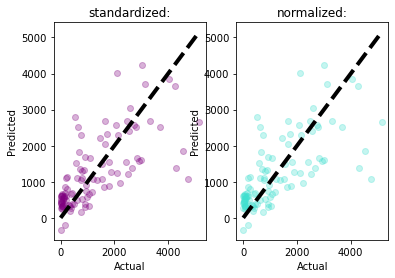

In [166]:

fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='turquoise')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [167]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


result for StandardScaler:
R2 score:0.4953388282110699
MAE score:532.8487378640776


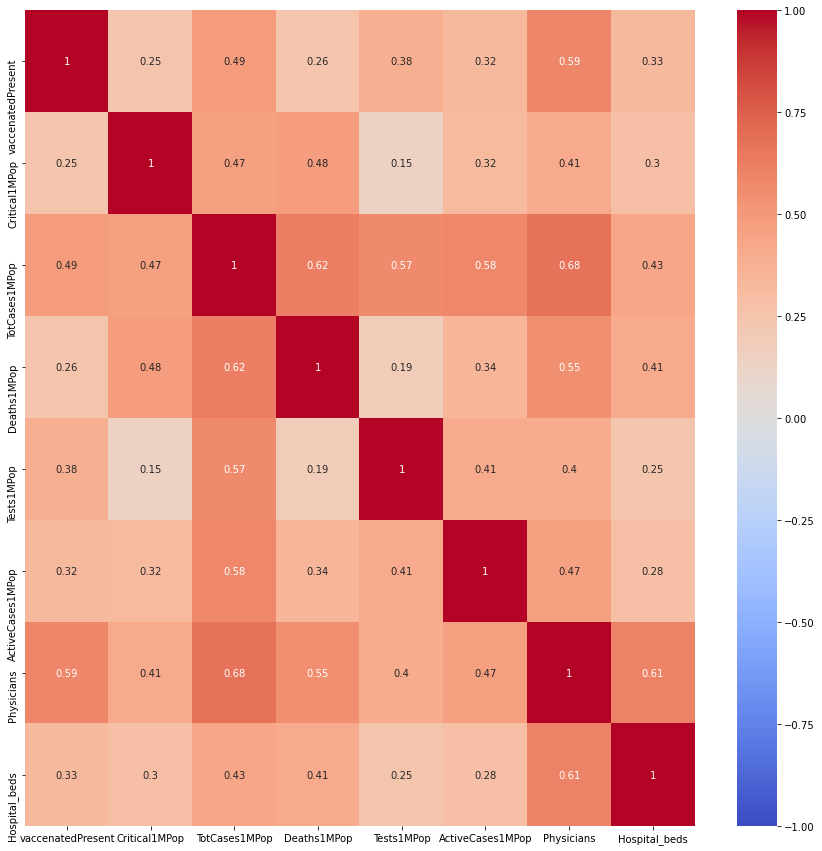

In [168]:
corr = final_df2.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()



In [169]:
corr[abs(corr['Deaths1MPop']) > 0.0]['Deaths1MPop']

vaccenatedPresent    0.255967
Critical1MPop        0.481240
TotCases1MPop        0.624734
Deaths1MPop          1.000000
Tests1MPop           0.193803
ActiveCases1MPop     0.344895
Physicians           0.551934
Hospital_beds        0.411438
Name: Deaths1MPop, dtype: float64

In [170]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [171]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    print("result for StandardScaler" + str(K)+":")
    print("R2 score:" +(str)(R2_scores_standardized.mean()))
    print("MAE score:" +(str)(mae_standarsized))
    
    
    






result for StandardScaler1:
R2 score:0.08034212225423872
MAE score:760.4077669902913
result for StandardScaler2:
R2 score:0.13827222895963578
MAE score:736.4563106796116
result for StandardScaler3:
R2 score:0.2634453941300391
MAE score:656.9514563106796
result for StandardScaler4:
R2 score:0.32753385702329807
MAE score:637.1844660194175
result for StandardScaler5:
R2 score:0.3224621261815905
MAE score:629.5533980582525
result for StandardScaler6:
R2 score:0.3694583938466439
MAE score:611.6423948220064
result for StandardScaler7:
R2 score:0.4036930851841383
MAE score:605.128987517337
result for StandardScaler8:
R2 score:0.39953645572467844
MAE score:624.1662621359224
result for StandardScaler9:
R2 score:0.4113873172986159
MAE score:615.6537216828477
result for StandardScaler10:
R2 score:0.43497984487303026
MAE score:609.5582524271845
result for StandardScaler11:
R2 score:0.4610362772118797
MAE score:597.2277140335393
result for StandardScaler12:
R2 score:0.48238336486671685
MAE score:58

In [172]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

NameError: name 'rmse_val' is not defined